Preprocessing, Feature Engineering, and Modeling

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

In [2]:
inpatient_test= pd.read_csv('Test_Inpatient_data.csv')

In [4]:
inpatient_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  9551 non-null   object 
 1   ClaimID                 9551 non-null   object 
 2   ClaimStartDt            9551 non-null   object 
 3   ClaimEndDt              9551 non-null   object 
 4   Provider                9551 non-null   object 
 5   InscClaimAmtReimbursed  9551 non-null   int64  
 6   AttendingPhysician      9520 non-null   object 
 7   OperatingPhysician      5589 non-null   object 
 8   OtherPhysician          1013 non-null   object 
 9   AdmissionDt             9551 non-null   object 
 10  ClmAdmitDiagnosisCode   9551 non-null   object 
 11  DeductibleAmtPaid       9355 non-null   float64
 12  DischargeDt             9551 non-null   object 
 13  DiagnosisGroupCode      9551 non-null   object 
 14  ClmDiagnosisCode_1      9551 non-null   

In [3]:
outpatient_test= pd.read_csv('Test_Outpatient_data.csv')

In [4]:
inpatient_train= pd.read_csv('Train_Inpatient_data.csv')

In [40]:
inpatient_train.shape

(40474, 30)

In [26]:
inpatient_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [282]:
inpatient_train.isna().sum()#/len(inpatient_train) *100

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
dtype: int64

In [49]:
outpatient_train.isna().sum()/len(outpatient_train) *100

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

In [45]:
outpatient_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [5]:
outpatient_train= pd.read_csv('Train_Outpatient_data.csv')

In [41]:
outpatient_data.shape

(517737, 27)

In [6]:
train_f= pd.read_csv('Train_data.csv')

In [9]:
ben_test= pd.read_csv('Test_Beneficiary_data.csv')

In [36]:

ben_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [7]:
ben_train= pd.read_csv('Train_Beneficiary_data.csv')

In [34]:
ben_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [17]:
len(inpatient_train['ClaimID'].unique())

40474

In [16]:
len(inpatient_train['BeneID'].unique())

31289

In [27]:
len(outpatient_data['BeneID'].unique())

133980

In [28]:
len(outpatient_data['BeneID'].unique())- len(inpatient_train['BeneID'].unique())

102691

In [43]:
len(outpatient_data['ClmAdmitDiagnosisCode']) - outpatient_data['ClmAdmitDiagnosisCode'].isna().sum()

105425

In [41]:
outpatient_data['ClmAdmitDiagnosisCode'].isna().sum()

412312

In [40]:
inpatient_train['ClmAdmitDiagnosisCode'].isna().sum()

0

In [18]:
len(inpatient_train['Provider'].unique())

2092

In [22]:
len(ben_train['BeneID'].unique())

138556

## Beneficiary Train

In [8]:
ben_train= pd.read_csv('Train_Beneficiary_data.csv')

In [934]:
ben_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   Gender                           138556 non-null  int64 
 2   Race                             138556 non-null  int64 
 3   RenalDiseaseIndicator            138556 non-null  object
 4   State                            138556 non-null  int64 
 5   County                           138556 non-null  int64 
 6   NoOfMonths_PartACov              138556 non-null  int64 
 7   NoOfMonths_PartBCov              138556 non-null  int64 
 8   ChronicCond_Alzheimer            138556 non-null  int64 
 9   ChronicCond_Heartfailure         138556 non-null  int64 
 10  ChronicCond_KidneyDisease        138556 non-null  int64 
 11  ChronicCond_Cancer               138556 non-null  int64 
 12  ChronicCond_Obst

In [14]:
ben_train['DOB']= pd.to_datetime(ben_train['DOB'])

In [15]:
ben_train['DOD']= pd.to_datetime(ben_train['DOD'])

In [16]:
ben_train['DOD'] = ben_train['DOD'].fillna('12-31-2009')

In [15]:
ben_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           138556 non-null  object        
 1   DOB                              138556 non-null  datetime64[ns]
 2   DOD                              138556 non-null  object        
 3   Gender                           138556 non-null  int64         
 4   Race                             138556 non-null  int64         
 5   RenalDiseaseIndicator            138556 non-null  object        
 6   State                            138556 non-null  int64         
 7   County                           138556 non-null  int64         
 8   NoOfMonths_PartACov              138556 non-null  int64         
 9   NoOfMonths_PartBCov              138556 non-null  int64         
 10  ChronicCond_Alzheimer            138556 non-

In [17]:
age= ben_train['DOD'] - ben_train['DOB']

In [18]:
ben_train['Age'] = round(age.dt.days.astype(float)/ 365)

In [19]:
ben_train['Age']= ben_train['Age'].astype('int64')

In [20]:


ben_train['Gender']= ben_train['Gender'].replace(2,0)

ben_train['RenalDiseaseIndicator']= ben_train['RenalDiseaseIndicator'].replace('Y',1)
ben_train['RenalDiseaseIndicator']= ben_train['RenalDiseaseIndicator'].replace('0',0)


ben_train['ChronicCond_Alzheimer']= ben_train['ChronicCond_Alzheimer'].replace(2,0)


ben_train['ChronicCond_Heartfailure']= ben_train['ChronicCond_Heartfailure'].replace(2,0)


ben_train['ChronicCond_KidneyDisease']= ben_train['ChronicCond_KidneyDisease'].replace(2,0)


ben_train['ChronicCond_Cancer']= ben_train['ChronicCond_Cancer'].replace(2,0)


ben_train['ChronicCond_ObstrPulmonary']= ben_train['ChronicCond_ObstrPulmonary'].replace(2,0)


ben_train['ChronicCond_Depression']= ben_train['ChronicCond_Depression'].replace(2,0)



ben_train['ChronicCond_Diabetes']= ben_train['ChronicCond_Diabetes'].replace(2,0)



ben_train['ChronicCond_IschemicHeart']= ben_train['ChronicCond_IschemicHeart'].replace(2,0)



ben_train['ChronicCond_Osteoporasis']= ben_train['ChronicCond_Osteoporasis'].replace(2,0)



ben_train['ChronicCond_rheumatoidarthritis']= ben_train['ChronicCond_rheumatoidarthritis'].replace(2,0)



ben_train['ChronicCond_stroke']= ben_train['ChronicCond_stroke'].replace(2,0)

In [21]:
ben_train['Total_ChronicCond']= ben_train['ChronicCond_Alzheimer']+ben_train['ChronicCond_Heartfailure']+ben_train['ChronicCond_KidneyDisease'] + ben_train['ChronicCond_Cancer']+ ben_train['ChronicCond_ObstrPulmonary']+ ben_train['ChronicCond_Depression']+ ben_train['ChronicCond_Diabetes']+ ben_train['ChronicCond_IschemicHeart']+ ben_train['ChronicCond_Osteoporasis'] + ben_train['ChronicCond_rheumatoidarthritis'] + ben_train['ChronicCond_stroke'] + ben_train['RenalDiseaseIndicator']

In [22]:
ben_train = ben_train.drop(['Gender', 'Race','DOB','DOD','NoOfMonths_PartACov','NoOfMonths_PartBCov'], axis=1) #'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'RenalDiseaseIndicator'], axis=1)

In [601]:
ben_train.head(20)

,BeneID,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,Total_ChronicCond
0,BENE11001,0,39,230,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,67,7
1,BENE11002,0,39,280,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,73,0
2,BENE11003,0,52,590,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,73,2
3,BENE11004,0,39,270,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,88,6
4,BENE11005,0,24,680,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,74,2
5,BENE11006,0,23,810,0,0,0,0,0,0,0,0,0,0,0,0,0,500,0,33,0
6,BENE11007,0,45,610,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,69,5
7,BENE11008,0,15,140,0,0,0,0,0,0,1,0,0,0,0,0,0,30,0,76,1
8,BENE11009,1,44,230,0,1,0,0,0,0,1,0,0,0,0,0,0,100,0,81,3
9,BENE11010,0,41,30,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660,74,6


## Inpatient Train

In [23]:
inpatient_train= pd.read_csv('Train_Inpatient_data.csv')

In [24]:
inpatient_train = inpatient_train.drop('ClmProcedureCode_6', axis=1) # DeductibleAmtPaid 1068

In [25]:
inpatient_train['DeductibleAmtPaid']= inpatient_train['DeductibleAmtPaid'].fillna(1068)

In [26]:
inpatient_train['ClmProcedureCode_1']= inpatient_train['ClmProcedureCode_1'].fillna(0)
inpatient_train['ClmProcedureCode_2']= inpatient_train['ClmProcedureCode_2'].fillna(0)
inpatient_train['ClmProcedureCode_3']= inpatient_train['ClmProcedureCode_3'].fillna(0)
inpatient_train['ClmProcedureCode_4']= inpatient_train['ClmProcedureCode_4'].fillna(0)
inpatient_train['ClmProcedureCode_5']= inpatient_train['ClmProcedureCode_5'].fillna(0)

In [1556]:
inpatient_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       40474 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [27]:
inpatient_train['ClmDiagnosisCode_1'] = inpatient_train['ClmDiagnosisCode_1'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_2'] = inpatient_train['ClmDiagnosisCode_2'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_3'] = inpatient_train['ClmDiagnosisCode_3'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_4'] = inpatient_train['ClmDiagnosisCode_4'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_5'] = inpatient_train['ClmDiagnosisCode_5'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_6'] = inpatient_train['ClmDiagnosisCode_6'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_7'] = inpatient_train['ClmDiagnosisCode_7'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_8'] = inpatient_train['ClmDiagnosisCode_8'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_9'] = inpatient_train['ClmDiagnosisCode_9'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmDiagnosisCode_10'] = inpatient_train['ClmDiagnosisCode_10'].apply(lambda x: x if np.isreal(x) else 1)

inpatient_train['ClmProcedureCode_1'] = inpatient_train['ClmProcedureCode_1'].apply(lambda x: 1 if x>0 else 0)

inpatient_train['ClmProcedureCode_2'] = inpatient_train['ClmProcedureCode_2'].apply(lambda x: 1 if x>0 else 0)

inpatient_train['ClmProcedureCode_3'] = inpatient_train['ClmProcedureCode_3'].apply(lambda x: 1 if x>0 else 0)

inpatient_train['ClmProcedureCode_4'] = inpatient_train['ClmProcedureCode_4'].apply(lambda x: 1 if x>0 else 0)

inpatient_train['ClmProcedureCode_5'] = inpatient_train['ClmProcedureCode_5'].apply(lambda x: 1 if x>0 else 0)

In [28]:
inpatient_train['ClmDiagnosisCode_1'] = inpatient_train['ClmDiagnosisCode_1'].fillna(0)

inpatient_train['ClmDiagnosisCode_2'] = inpatient_train['ClmDiagnosisCode_2'].fillna(0)

inpatient_train['ClmDiagnosisCode_3'] = inpatient_train['ClmDiagnosisCode_3'].fillna(0)

inpatient_train['ClmDiagnosisCode_4'] = inpatient_train['ClmDiagnosisCode_4'].fillna(0)

inpatient_train['ClmDiagnosisCode_5'] = inpatient_train['ClmDiagnosisCode_5'].fillna(0)

inpatient_train['ClmDiagnosisCode_6'] = inpatient_train['ClmDiagnosisCode_6'].fillna(0)

inpatient_train['ClmDiagnosisCode_7'] = inpatient_train['ClmDiagnosisCode_7'].fillna(0)

inpatient_train['ClmDiagnosisCode_8'] = inpatient_train['ClmDiagnosisCode_8'].fillna(0)

inpatient_train['ClmDiagnosisCode_9'] = inpatient_train['ClmDiagnosisCode_9'].fillna(0)

inpatient_train['ClmDiagnosisCode_10'] = inpatient_train['ClmDiagnosisCode_10'].fillna(0)

In [29]:
inpatient_train['ClaimStartDt']= pd.to_datetime(inpatient_train['ClaimStartDt'])
inpatient_train['ClaimEndDt']= pd.to_datetime(inpatient_train['ClaimEndDt'])
inpatient_train['AdmissionDt']= pd.to_datetime(inpatient_train['AdmissionDt'])
inpatient_train['DischargeDt']= pd.to_datetime(inpatient_train['DischargeDt'])


In [30]:
inpatient_train['Claim_Duration'] = ((inpatient_train['ClaimEndDt'] - inpatient_train['ClaimStartDt']).dt.days.abs())+1
inpatient_train['Hospital_time'] = ((inpatient_train['DischargeDt'] - inpatient_train['AdmissionDt']).dt.days.abs())+1

inpatient_train['ClmDiagnosisTotal'] = inpatient_train['ClmDiagnosisCode_1'] + inpatient_train['ClmDiagnosisCode_2'] + inpatient_train['ClmDiagnosisCode_3']+ inpatient_train['ClmDiagnosisCode_4'] + inpatient_train['ClmDiagnosisCode_5'] + inpatient_train['ClmDiagnosisCode_6']+ inpatient_train['ClmDiagnosisCode_7'] + inpatient_train['ClmDiagnosisCode_8'] + inpatient_train['ClmDiagnosisCode_9']+ inpatient_train['ClmDiagnosisCode_10']

inpatient_train['ClmProcedureTotal'] = inpatient_train['ClmProcedureCode_1'] + inpatient_train['ClmProcedureCode_2'] + inpatient_train['ClmProcedureCode_3'] + inpatient_train['ClmProcedureCode_4'] + inpatient_train['ClmProcedureCode_5']

In [31]:
inpatient_train['AttendingPhysician']= inpatient_train['AttendingPhysician'].replace(np.nan, 0)
inpatient_train['OperatingPhysician']= inpatient_train['OperatingPhysician'].replace(np.nan, 0)
inpatient_train['OtherPhysician']= inpatient_train['OtherPhysician'].replace(np.nan, 0)
inpatient_train['AttendingPhysician'] = inpatient_train['AttendingPhysician'].apply(lambda x: x if np.isreal(x) else 1)
inpatient_train['OperatingPhysician'] = inpatient_train['OperatingPhysician'].apply(lambda x: x if np.isreal(x) else 1)
inpatient_train['OtherPhysician'] = inpatient_train['OtherPhysician'].apply(lambda x: x if np.isreal(x) else 1)


In [33]:
inpatient_train['Physicians']= inpatient_train['AttendingPhysician'] + inpatient_train['OperatingPhysician'] + inpatient_train['OtherPhysician']

In [34]:
inpatient_train= inpatient_train.drop(['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis=1)

In [35]:
inpatient_train['Patient_Type']= '1'

In [36]:
inpatient_train['Total_Claim_Cost'] = round((inpatient_train['DeductibleAmtPaid'] + inpatient_train['InscClaimAmtReimbursed']) / inpatient_train['Hospital_time']) 

In [37]:
inpatient_train= inpatient_train.drop(['DeductibleAmtPaid', 'InscClaimAmtReimbursed'], axis=1)

In [38]:
inpatient_train.head(20)

,BeneID,ClaimID,Provider,ClmAdmitDiagnosisCode,DiagnosisGroupCode,Claim_Duration,Hospital_time,ClmDiagnosisTotal,ClmProcedureTotal,Physicians,Patient_Type,Total_Claim_Cost
0,BENE11001,CLM46614,PRV55912,7866,201,7,7,9.0,0,1,1,3867.0
1,BENE11001,CLM66048,PRV55907,6186,750,3,3,3.0,1,2,1,2023.0
2,BENE11001,CLM68358,PRV56046,29590,883,4,4,6.0,0,2,1,1517.0
3,BENE11011,CLM38412,PRV52405,431,067,9,9,9.0,1,3,1,674.0
4,BENE11014,CLM63689,PRV56614,78321,975,18,18,9.0,1,2,1,615.0
5,BENE11017,CLM70950,PRV54986,1749,597,7,7,9.0,1,3,1,1295.0
6,BENE11018,CLM32075,PRV54090,5699,390,6,6,9.0,1,2,1,1511.0
7,BENE11028,CLM62376,PRV51148,78605,379,5,5,9.0,1,2,1,1414.0
8,BENE11031,CLM62784,PRV55839,2859,294,4,4,6.0,0,1,1,2017.0
9,BENE11034,CLM31519,PRV55215,41401,262,8,8,9.0,2,2,1,3758.0


## Outpatient Train

In [39]:
outpatient_train= pd.read_csv('Train_Outpatient_data.csv')

In [40]:
outpatient_train= outpatient_train.drop('ClmProcedureCode_6', axis=1)

In [41]:
outpatient_train['ClmProcedureCode_1']= outpatient_train['ClmProcedureCode_1'].fillna(0)
outpatient_train['ClmProcedureCode_2']= outpatient_train['ClmProcedureCode_2'].fillna(0)
outpatient_train['ClmProcedureCode_3']= outpatient_train['ClmProcedureCode_3'].fillna(0)
outpatient_train['ClmProcedureCode_4']= outpatient_train['ClmProcedureCode_4'].fillna(0)
outpatient_train['ClmProcedureCode_5']= outpatient_train['ClmProcedureCode_5'].fillna(0)

In [42]:
outpatient_train['ClmDiagnosisCode_1'] = outpatient_train['ClmDiagnosisCode_1'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_2'] = outpatient_train['ClmDiagnosisCode_2'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_3'] = outpatient_train['ClmDiagnosisCode_3'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_4'] = outpatient_train['ClmDiagnosisCode_4'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_5'] = outpatient_train['ClmDiagnosisCode_5'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_6'] = outpatient_train['ClmDiagnosisCode_6'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_7'] = outpatient_train['ClmDiagnosisCode_7'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_8'] = outpatient_train['ClmDiagnosisCode_8'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_9'] = outpatient_train['ClmDiagnosisCode_9'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmDiagnosisCode_10'] = outpatient_train['ClmDiagnosisCode_10'].apply(lambda x: x if np.isreal(x) else 1)

outpatient_train['ClmProcedureCode_1'] = outpatient_train['ClmProcedureCode_1'].apply(lambda x: 1 if x>0 else 0)

outpatient_train['ClmProcedureCode_2'] = outpatient_train['ClmProcedureCode_2'].apply(lambda x: 1 if x>0 else 0)

outpatient_train['ClmProcedureCode_3'] = outpatient_train['ClmProcedureCode_3'].apply(lambda x: 1 if x>0 else 0)

outpatient_train['ClmProcedureCode_4'] = outpatient_train['ClmProcedureCode_4'].apply(lambda x: 1 if x>0 else 0)

outpatient_train['ClmProcedureCode_5'] = outpatient_train['ClmProcedureCode_5'].apply(lambda x: 1 if x>0 else 0)


In [43]:
outpatient_train['ClmDiagnosisCode_1'] = outpatient_train['ClmDiagnosisCode_1'].fillna(0)

outpatient_train['ClmDiagnosisCode_2'] = outpatient_train['ClmDiagnosisCode_2'].fillna(0)

outpatient_train['ClmDiagnosisCode_3'] = outpatient_train['ClmDiagnosisCode_3'].fillna(0)

outpatient_train['ClmDiagnosisCode_4'] = outpatient_train['ClmDiagnosisCode_4'].fillna(0)

outpatient_train['ClmDiagnosisCode_5'] = outpatient_train['ClmDiagnosisCode_5'].fillna(0)

outpatient_train['ClmDiagnosisCode_6'] = outpatient_train['ClmDiagnosisCode_6'].fillna(0)

outpatient_train['ClmDiagnosisCode_7'] = outpatient_train['ClmDiagnosisCode_7'].fillna(0)

outpatient_train['ClmDiagnosisCode_8'] = outpatient_train['ClmDiagnosisCode_8'].fillna(0)

outpatient_train['ClmDiagnosisCode_9'] = outpatient_train['ClmDiagnosisCode_9'].fillna(0)

outpatient_train['ClmDiagnosisCode_10'] = outpatient_train['ClmDiagnosisCode_10'].fillna(0)

In [44]:
outpatient_train['ClaimStartDt']= pd.to_datetime(outpatient_train['ClaimStartDt'])
outpatient_train['ClaimEndDt']= pd.to_datetime(outpatient_train['ClaimEndDt'])

In [45]:
outpatient_train['Claim_Duration'] = ((outpatient_train['ClaimEndDt'] - outpatient_train['ClaimStartDt']).dt.days.abs())+1

outpatient_train['ClmDiagnosisTotal'] = outpatient_train['ClmDiagnosisCode_1'] + outpatient_train['ClmDiagnosisCode_2'] + outpatient_train['ClmDiagnosisCode_3']+ outpatient_train['ClmDiagnosisCode_4'] + outpatient_train['ClmDiagnosisCode_5'] + outpatient_train['ClmDiagnosisCode_6']+ outpatient_train['ClmDiagnosisCode_7'] + outpatient_train['ClmDiagnosisCode_8'] + outpatient_train['ClmDiagnosisCode_9']+ outpatient_train['ClmDiagnosisCode_10']

outpatient_train['ClmProcedureTotal'] = outpatient_train['ClmProcedureCode_1'] + outpatient_train['ClmProcedureCode_2'] + outpatient_train['ClmProcedureCode_3'] + outpatient_train['ClmProcedureCode_4'] + outpatient_train['ClmProcedureCode_5']

In [46]:
outpatient_train['AttendingPhysician']= outpatient_train['AttendingPhysician'].replace(np.nan, 0)
outpatient_train['OperatingPhysician']= outpatient_train['OperatingPhysician'].replace(np.nan, 0)
outpatient_train['OtherPhysician']= outpatient_train['OtherPhysician'].replace(np.nan, 0)
outpatient_train['AttendingPhysician'] = outpatient_train['AttendingPhysician'].apply(lambda x: x if np.isreal(x) else 1)
outpatient_train['OperatingPhysician'] = outpatient_train['OperatingPhysician'].apply(lambda x: x if np.isreal(x) else 1)
outpatient_train['OtherPhysician'] = outpatient_train['OtherPhysician'].apply(lambda x: x if np.isreal(x) else 1)


In [47]:
outpatient_train['Physicians']= outpatient_train['AttendingPhysician'] + outpatient_train['OperatingPhysician'] + outpatient_train['OtherPhysician']

In [48]:
outpatient_train= outpatient_train.drop(['ClaimStartDt', 'ClaimEndDt', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis=1)

In [49]:
outpatient_train['Patient_Type']= '0'

In [50]:
outpatient_train['Total_Claim_Cost'] = (outpatient_train['DeductibleAmtPaid'] + outpatient_train['InscClaimAmtReimbursed'])

In [51]:
outpatient_train= outpatient_train.drop(['DeductibleAmtPaid', 'InscClaimAmtReimbursed'], axis=1)

In [53]:
outpatient_train

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_Duration,ClmDiagnosisTotal,ClmProcedureTotal,Physicians,Patient_Type,Total_Claim_Cost
0,BENE11002,CLM624349,PRV56011,30,0,56409,1,3.0,0,1,0,30
1,BENE11003,CLM189947,PRV57610,80,0,79380,1,1.0,0,1,0,80
2,BENE11003,CLM438021,PRV57595,10,0,0,1,1.0,0,1,0,10
3,BENE11004,CLM121801,PRV56011,40,0,0,1,1.0,0,1,0,40
4,BENE11004,CLM150998,PRV56011,200,0,71947,1,6.0,0,1,0,200
...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,PRV53699,800,0,0,1,3.0,0,3,0,800
517733,BENE159198,CLM551294,PRV53702,400,0,0,1,3.0,0,2,0,400
517734,BENE159198,CLM596444,PRV53676,60,0,0,1,2.0,0,1,0,60
517735,BENE159198,CLM636992,PRV53689,70,0,0,1,0.0,0,2,0,70


## Merging new datasets

array([[<AxesSubplot:title={'center':'InscClaimAmtReimbursed'}>,
        <AxesSubplot:title={'center':'DeductibleAmtPaid'}>],
       [<AxesSubplot:title={'center':'Claim_Duration'}>,
        <AxesSubplot:title={'center':'Hospital_time'}>],
       [<AxesSubplot:title={'center':'ClmDiagnosisTotal'}>,
        <AxesSubplot:title={'center':'ClmProcedureTotal'}>]], dtype=object)

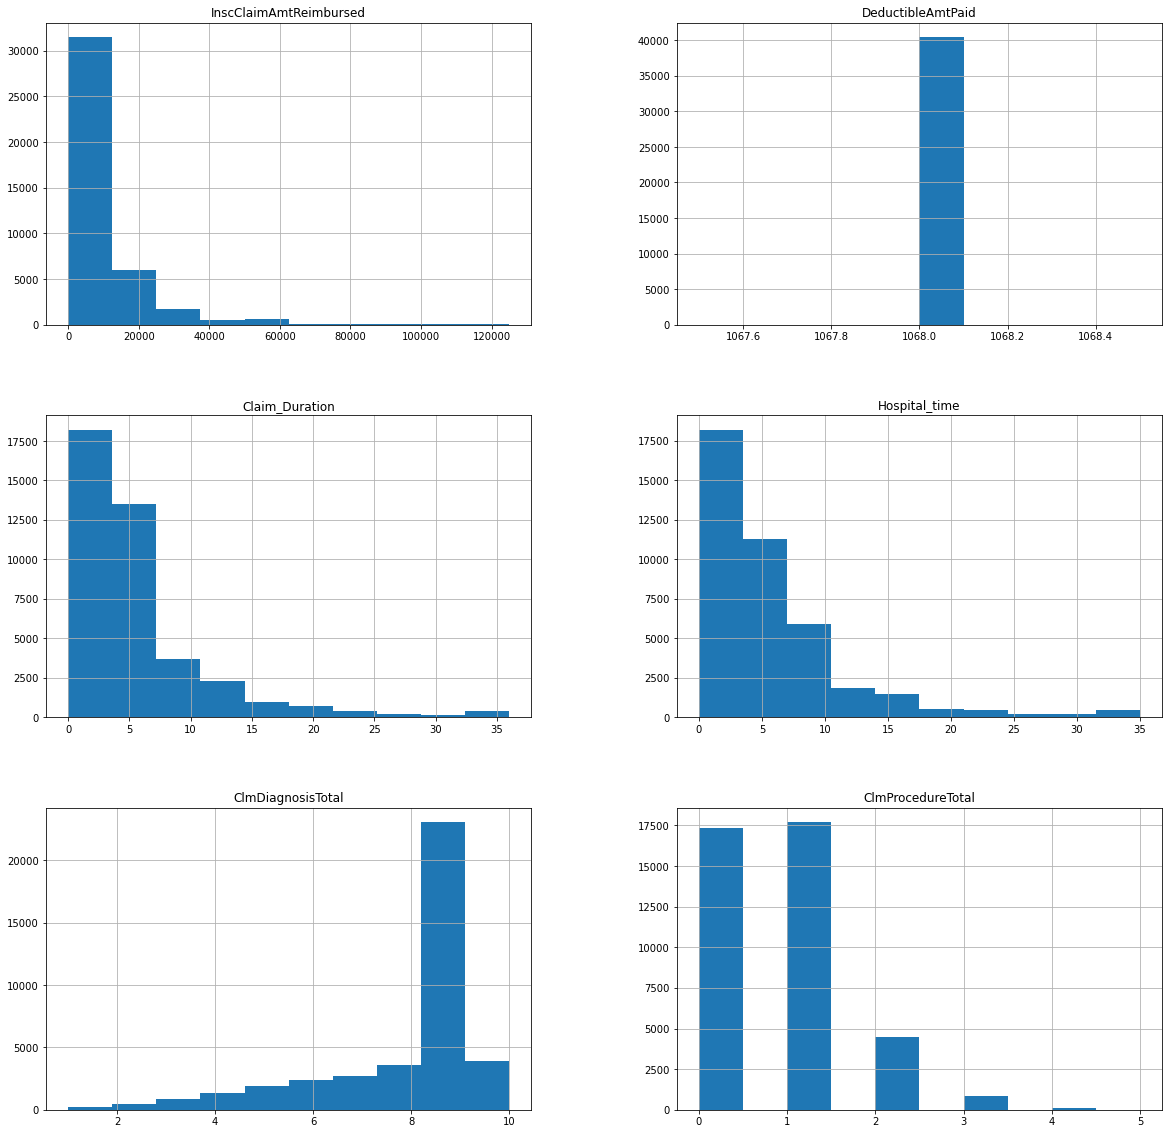

In [1018]:
inpatient_train.hist(figsize=(20,20))

array([[<AxesSubplot:title={'center':'InscClaimAmtReimbursed'}>,
        <AxesSubplot:title={'center':'DeductibleAmtPaid'}>],
       [<AxesSubplot:title={'center':'Claim_Duration'}>,
        <AxesSubplot:title={'center':'ClmDiagnosisTotal'}>],
       [<AxesSubplot:title={'center':'ClmProcedureTotal'}>,
        <AxesSubplot:>]], dtype=object)

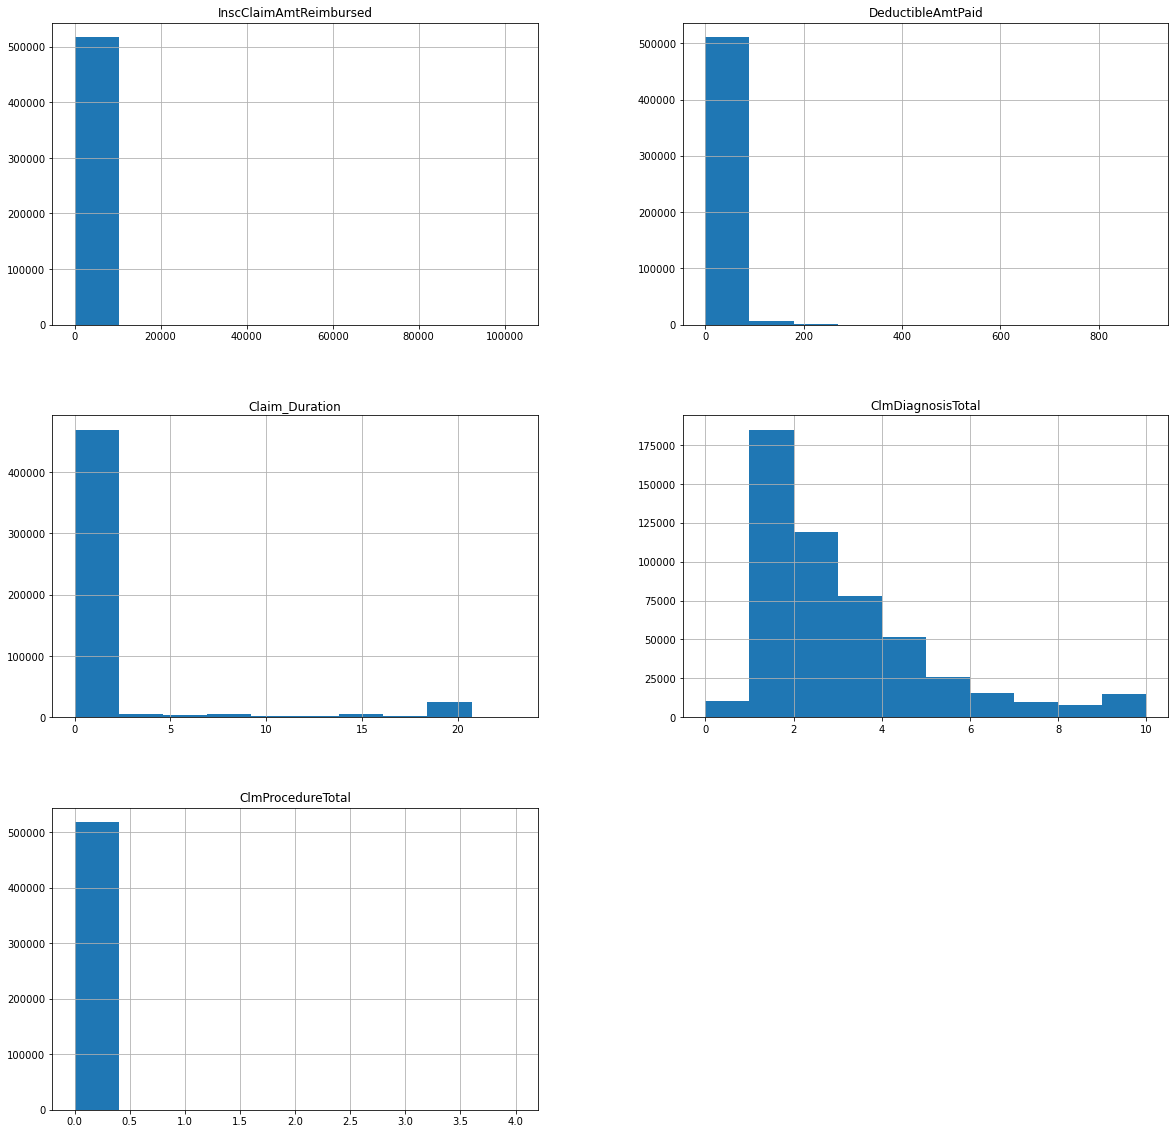

In [1017]:
outpatient_train.hist(figsize=(20,20))

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'State'}>],
       [<AxesSubplot:title={'center':'County'}>,
        <AxesSubplot:title={'center':'IPAnnualReimbursementAmt'}>,
        <AxesSubplot:title={'center':'IPAnnualDeductibleAmt'}>],
       [<AxesSubplot:title={'center':'OPAnnualReimbursementAmt'}>,
        <AxesSubplot:title={'center':'OPAnnualDeductibleAmt'}>,
        <AxesSubplot:title={'center':'Died'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_ChronicCond'}>,
        <AxesSubplot:>]], dtype=object)

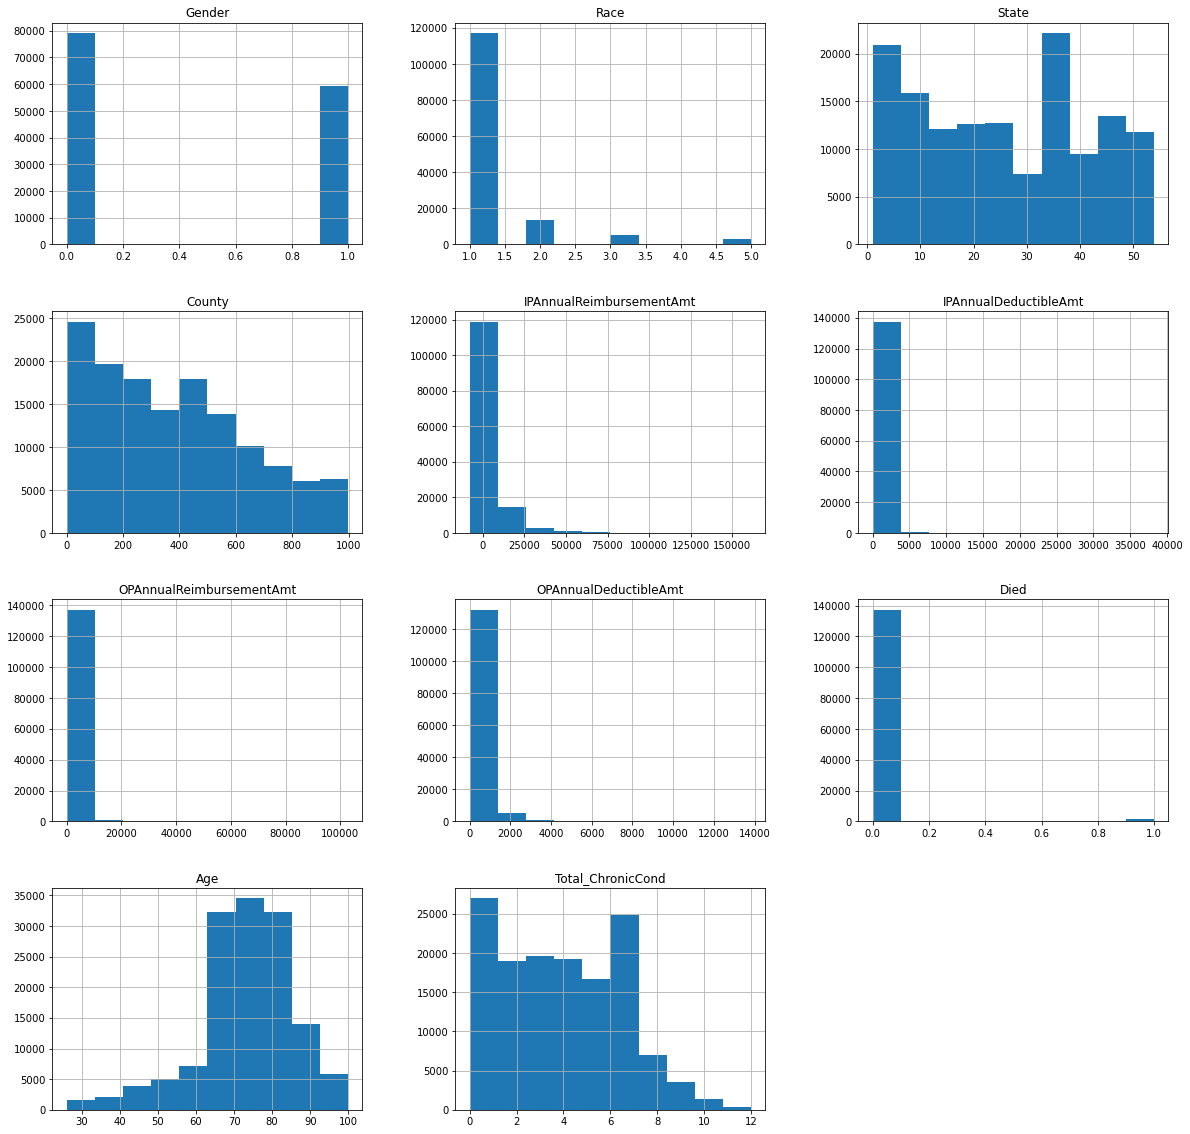

In [1016]:
ben_train.hist(figsize=(20,20))

In [119]:
train_patient_merge_id = [i for i in outpatient_train.columns if i in inpatient_train.columns]

In [120]:
train_patient_merge_id

['BeneID',
 'ClaimID',
 'Provider',
 'ClmAdmitDiagnosisCode',
 'Claim_Duration',
 'ClmDiagnosisTotal',
 'ClmProcedureTotal',
 'Physicians',
 'Patient_Type',
 'Total_Claim_Cost']

In [121]:
train_patient_data = pd.merge(inpatient_train, outpatient_train,
                    left_on = train_patient_merge_id,
                    right_on = train_patient_merge_id,
                    how = 'outer').\
          merge(ben_train,left_on='BeneID',right_on='BeneID',how='inner')

In [122]:
train_patient_data.shape

(558211, 32)

In [123]:
train_patient_data= train_patient_data.drop(['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'], axis=1)

In [56]:
train_patient_data.head(12)

,BeneID,ClaimID,Provider,ClmAdmitDiagnosisCode,DiagnosisGroupCode,Claim_Duration,Hospital_time,ClmDiagnosisTotal,ClmProcedureTotal,Physicians,Patient_Type,Total_Claim_Cost,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,Total_ChronicCond
0,BENE11001,CLM46614,PRV55912,7866,201,7,7.0,9.0,0,1,1,3867.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7
1,BENE11001,CLM66048,PRV55907,6186,750,3,3.0,3.0,1,2,1,2023.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7
2,BENE11001,CLM68358,PRV56046,29590,883,4,4.0,6.0,0,2,1,1517.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7
3,BENE11011,CLM38412,PRV52405,431,067,9,9.0,9.0,1,3,1,674.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6
4,BENE11011,CLM144521,PRV52314,78900,NaN,1,NaN,5.0,0,1,0,50.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6
5,BENE11011,CLM347780,PRV51012,37611,NaN,1,NaN,1.0,0,2,0,50.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6
6,BENE11011,CLM507201,PRV51063,311,NaN,1,NaN,3.0,0,1,0,80.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6
7,BENE11014,CLM63689,PRV56614,78321,975,18,18.0,9.0,1,2,1,615.0,1,45,780,0,1,1,0,1,1,0,1,0,0,0,72,6
8,BENE11014,CLM523157,PRV56835,NaN,NaN,1,NaN,1.0,0,2,0,60.0,1,45,780,0,1,1,0,1,1,0,1,0,0,0,72,6
9,BENE11017,CLM70950,PRV54986,1749,597,7,7.0,9.0,1,3,1,1295.0,0,31,270,1,1,1,1,1,0,1,1,0,1,1,70,9


In [124]:
train_patient_data['Hospital_time']= train_patient_data['Hospital_time'].fillna(1)

In [125]:
train_patient_data['Age_bins'] = pd.cut(x=train_patient_data['Age'], bins=[25, 29, 39, 49, 59, 69, 79, 89, 102], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-101'])

In [126]:
Ages_bins= pd.get_dummies(train_patient_data.Age_bins, prefix='Age')

In [127]:
train_patient_data= pd.concat([train_patient_data, Ages_bins], axis=1)

In [128]:
train_patient_data['Age_bins']= train_patient_data['Age_bins'].astype('object')

In [83]:
train_patient_data

,BeneID,ClaimID,Provider,ClmAdmitDiagnosisCode,DiagnosisGroupCode,Claim_Duration,Hospital_time,ClmDiagnosisTotal,ClmProcedureTotal,Physicians,Patient_Type,Total_Claim_Cost,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,Total_ChronicCond,Age_bins,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-102
0,BENE11001,CLM46614,PRV55912,7866,201,7,7.0,9.0,0,1,1,3867.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7,60-70,0,0,0,0,1,0,0,0
1,BENE11001,CLM66048,PRV55907,6186,750,3,3.0,3.0,1,2,1,2023.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7,60-70,0,0,0,0,1,0,0,0
2,BENE11001,CLM68358,PRV56046,29590,883,4,4.0,6.0,0,2,1,1517.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7,60-70,0,0,0,0,1,0,0,0
3,BENE11011,CLM38412,PRV52405,431,067,9,9.0,9.0,1,3,1,674.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6,90-102,0,0,0,0,0,0,0,1
4,BENE11011,CLM144521,PRV52314,78900,NaN,1,1.0,5.0,0,1,0,50.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6,90-102,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,PRV53699,NaN,NaN,1,1.0,3.0,0,3,0,800.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0
558207,BENE159198,CLM551294,PRV53702,NaN,NaN,1,1.0,3.0,0,2,0,400.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0
558208,BENE159198,CLM596444,PRV53676,NaN,NaN,1,1.0,2.0,0,1,0,60.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0
558209,BENE159198,CLM636992,PRV53689,NaN,NaN,1,1.0,0.0,0,2,0,70.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0


In [620]:
#ChronicConditions

In [104]:
chron= train_patient_data[['BeneID', 'Provider', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']]

In [105]:
chron= chron.drop_duplicates()

In [106]:
chron= chron.groupby('Provider').sum().reset_index()

In [1254]:
chron

,Provider,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke
0,PRV51001,8,14,18,17,5,9,9,20,22,6,8,5
1,PRV51003,22,44,70,52,10,33,47,87,99,28,32,9
2,PRV51004,20,60,82,47,16,37,60,96,98,43,41,16
3,PRV51005,79,165,263,178,59,105,184,314,347,142,127,39
4,PRV51007,9,21,30,17,6,12,21,36,40,17,16,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,4,12,18,13,3,9,7,18,24,11,8,3
5406,PRV57760,0,2,4,2,0,2,4,6,9,4,1,0
5407,PRV57761,17,29,45,31,11,23,28,46,51,24,22,8
5408,PRV57762,0,0,0,1,1,1,0,1,1,0,0,0


In [107]:
df_merged= df_merged.merge(chron, on='Provider')

In [108]:
df_merged['RenalDiseaseIndicator'] = (df_merged['RenalDiseaseIndicator'] / df_merged['Unique_patients'])
df_merged['ChronicCond_Alzheimer'] = (df_merged['ChronicCond_Alzheimer'] / df_merged['Unique_patients'])
df_merged['ChronicCond_Heartfailure'] = (df_merged['ChronicCond_Heartfailure'] / df_merged['Unique_patients'])
df_merged['ChronicCond_KidneyDisease'] = (df_merged['ChronicCond_KidneyDisease'] / df_merged['Unique_patients'])
df_merged['ChronicCond_Cancer'] = (df_merged['ChronicCond_Cancer'] / df_merged['Unique_patients'])
df_merged['ChronicCond_ObstrPulmonary'] = (df_merged['ChronicCond_ObstrPulmonary'] / df_merged['Unique_patients'])
df_merged['ChronicCond_Diabetes'] = (df_merged['ChronicCond_Diabetes'] / df_merged['Unique_patients'])
df_merged['ChronicCond_Depression'] = (df_merged['ChronicCond_Depression'] / df_merged['Unique_patients'])
df_merged['ChronicCond_IschemicHeart'] = (df_merged['ChronicCond_IschemicHeart'] / df_merged['Unique_patients'])
df_merged['ChronicCond_Osteoporasis'] = (df_merged['ChronicCond_Osteoporasis'] / df_merged['Unique_patients'])
df_merged['ChronicCond_rheumatoidarthritis'] = (df_merged['ChronicCond_rheumatoidarthritis'] / df_merged['Unique_patients'])
df_merged['ChronicCond_stroke'] = (df_merged['ChronicCond_stroke'] / df_merged['Unique_patients'])


In [1300]:
df_merged.iloc[:,27:39]= round(df_merged.iloc[:,27:39], 2)

In [457]:
df_merged.groupby('PotentialFraud').mean()

,Unique_count_counties,Unique_count_states,Avg_Hospital_time,Avg_Claim_Duration,ClmProcedureTotal_PP,ClmDiagnosisTotal_PP,DiagnosisGroupCode_Total,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,Avg_Physicians,Avg_Total_Claim_Cost_PP,Avg_Total_Claim_Cost,Claim_count,Unique_patients,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101,Average_ClaimCost
PotentialFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.537520,2.283646,1.719873,2.914981,0.093123,3.301988,3.481240,3.385604,17.098287,15.659054,1.577418,528.923079,530.958386,70.435359,49.110318,0.186073,0.392094,0.577828,0.401629,0.148369,0.308387,0.422673,0.690436,0.752168,0.313163,0.299560,0.100006,0.004431,0.017836,0.036128,0.062892,0.185944,0.354072,0.254519,0.083866,1662.449655
1,21.249012,5.379447,3.003209,3.973527,0.252301,4.428544,46.249012,41.403162,122.626482,80.683794,1.607271,1003.966564,1011.899540,420.545455,242.021739,0.204091,0.409249,0.603300,0.443518,0.150415,0.337668,0.438063,0.708498,0.767273,0.319783,0.316087,0.112332,0.005000,0.019091,0.035119,0.061680,0.185593,0.355079,0.251917,0.086917,4431.332584


In [452]:
df_merged['Average_ClaimCost'] = df_merged['Avg_Total_Claim_Cost'] *  df_merged['Avg_Hospital_time']

In [456]:
df_merged.groupby('PotentialFraud')[['Average_ClaimCost']].mean().reset_index()

,PotentialFraud,Average_ClaimCost
0,0,1662.449655
1,1,4431.332584


In [458]:
df_merged.groupby('PotentialFraud')[['Average_ClaimCost']].median().reset_index()

,PotentialFraud,Average_ClaimCost
0,0,328.819172
1,1,1799.858948


In [129]:
test=train_patient_data[['BeneID', 'Provider','Age_20-30', 'Age_30-40', 'Age_40-50', 'Age_50-60',
       'Age_60-70', 'Age_70-80', 'Age_80-90', 'Age_90-101']]

In [130]:
test= test.drop_duplicates()

In [131]:
test

,BeneID,Provider,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
0,BENE11001,PRV55912,0,0,0,0,1,0,0,0
1,BENE11001,PRV55907,0,0,0,0,1,0,0,0
2,BENE11001,PRV56046,0,0,0,0,1,0,0,0
3,BENE11011,PRV52405,0,0,0,0,0,0,0,1
4,BENE11011,PRV52314,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
558200,BENE159198,PRV53672,0,0,0,1,0,0,0,0
558202,BENE159198,PRV53699,0,0,0,1,0,0,0,0
558203,BENE159198,PRV53670,0,0,0,1,0,0,0,0
558207,BENE159198,PRV53702,0,0,0,1,0,0,0,0


In [132]:
test= test.groupby('Provider').sum().reset_index()

In [133]:
df_merged= df_merged.merge(test, on='Provider')

In [134]:
df_merged['Age_20-30'] = (df_merged['Age_20-30'] / df_merged['Unique_patients'])

In [135]:
df_merged['Age_30-40'] = (df_merged['Age_30-40'] / df_merged['Unique_patients'])

In [136]:
df_merged['Age_40-50'] = (df_merged['Age_40-50'] / df_merged['Unique_patients'])

In [137]:
df_merged['Age_50-60'] = (df_merged['Age_50-60'] / df_merged['Unique_patients'])

In [138]:
df_merged['Age_60-70'] = (df_merged['Age_60-70'] / df_merged['Unique_patients'])

In [139]:
df_merged['Age_70-80'] = (df_merged['Age_70-80'] / df_merged['Unique_patients'])

In [140]:
df_merged['Age_80-90'] = (df_merged['Age_80-90'] / df_merged['Unique_patients'])

In [141]:
df_merged['Age_90-101'] = (df_merged['Age_90-101'] / df_merged['Unique_patients'])

In [146]:
df_merged.iloc[:,17:39]= round(df_merged.iloc[:,17:39], 2)

In [147]:
df_merged

,Provider,Unique_count_counties,Unique_count_states,Avg_Hospital_time,Avg_Claim_Duration,ClmProcedureTotal_PP,ClmDiagnosisTotal_PP,DiagnosisGroupCode_Total,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,Avg_Physicians,Avg_Total_Claim_Cost_PP,Avg_Total_Claim_Cost,Claim_count,Unique_patients,PotentialFraud,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
0,PRV51001,7,1,2.000000,2.440000,0.120000,3.200000,5,5,11,12,1.600000,1145.083333,1121.080000,25,24,0,0.33,0.58,0.75,0.71,0.21,0.38,0.38,0.83,0.92,0.25,0.33,0.21,0.00,0.00,0.00,0.08,0.12,0.29,0.25,0.25
1,PRV51003,23,3,3.424242,4.674242,0.363636,5.250000,62,58,78,59,1.530303,1382.559829,1368.287879,132,117,1,0.19,0.38,0.60,0.44,0.09,0.28,0.40,0.74,0.85,0.24,0.27,0.08,0.00,0.02,0.10,0.11,0.16,0.41,0.16,0.03
2,PRV51004,28,9,1.000000,2.429530,0.000000,2.583893,0,0,28,26,1.604027,352.415459,352.214765,149,138,0,0.14,0.43,0.59,0.34,0.12,0.27,0.43,0.70,0.71,0.31,0.30,0.12,0.01,0.00,0.07,0.08,0.20,0.32,0.25,0.08
3,PRV51005,26,4,1.000000,2.088412,0.000000,2.588841,0,0,252,159,1.599142,256.429705,244.300429,1165,495,1,0.16,0.33,0.53,0.36,0.12,0.21,0.37,0.63,0.70,0.29,0.26,0.08,0.00,0.03,0.04,0.12,0.24,0.30,0.21,0.05
4,PRV51007,6,2,1.222222,1.958333,0.013889,2.986111,3,3,17,18,1.527778,234.129310,257.458333,72,58,0,0.16,0.36,0.52,0.29,0.10,0.21,0.36,0.62,0.69,0.29,0.28,0.16,0.02,0.05,0.03,0.10,0.24,0.34,0.12,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,2,1,1.000000,3.142857,0.000000,2.071429,0,0,3,4,1.464286,382.708333,384.642857,28,24,0,0.17,0.50,0.75,0.54,0.12,0.38,0.29,0.75,1.00,0.46,0.33,0.12,0.00,0.00,0.00,0.08,0.08,0.54,0.25,0.04
5406,PRV57760,3,1,1.000000,1.318182,0.000000,2.363636,0,0,7,8,1.681818,295.416667,216.818182,22,9,0,0.00,0.22,0.44,0.22,0.00,0.22,0.44,0.67,1.00,0.44,0.11,0.00,0.00,0.00,0.11,0.22,0.22,0.33,0.11,0.00
5407,PRV57761,2,1,1.000000,2.390244,0.000000,2.670732,0,0,18,17,1.609756,208.619403,229.756098,82,67,0,0.25,0.43,0.67,0.46,0.16,0.34,0.42,0.69,0.76,0.36,0.33,0.12,0.00,0.04,0.01,0.03,0.21,0.34,0.27,0.09
5408,PRV57762,1,1,1.000000,1.000000,0.000000,1.000000,0,0,1,1,1.000000,1900.000000,1900.000000,1,1,0,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


Unique Bene

In [58]:
Unique_patients= train_patient_data.groupby('Provider')['BeneID'].unique().apply(lambda x: len(x)).to_frame('Unique_patients').reset_index()

Claims

In [59]:
Claim_count= train_patient_data.groupby('Provider')['ClaimID'].agg("count").to_frame("Claim_count").reset_index()

InscClaimAmtReimbursed

In [60]:
Avg_Total_Claim_Cost= train_patient_data.groupby('Provider')['Total_Claim_Cost'].mean().to_frame("Avg_Total_Claim_Cost").reset_index()

per patient

In [61]:
Avg_Total_Claim_Cost_PP = train_patient_data.groupby(['Provider','BeneID'])['Total_Claim_Cost'].mean().reset_index().groupby('Provider')['Total_Claim_Cost'].mean().to_frame("Avg_Total_Claim_Cost_PP")


Physicians

In [62]:
Avg_Physicians= train_patient_data.groupby('Provider')['Physicians'].mean().to_frame("Avg_Physicians").reset_index()

In [63]:
Unique_ClmAdmitDiagnosisCode= train_patient_data.groupby(['Provider'])['ClmAdmitDiagnosisCode'].unique().apply(lambda x: len(x)).to_frame('Unique_ClmAdmitDiagnosisCode')


In [64]:
#count of ClmAdmitDiagnosisCode per provider (sum)
ClmAdmitDiagnosisCode_count= train_patient_data.groupby('Provider')['ClmAdmitDiagnosisCode'].agg("count").to_frame("ClmAdmitDiagnosisCode_count")


In [65]:
Unique_DiagnosisGroupCode= train_patient_data.groupby(['Provider'])['DiagnosisGroupCode'].nunique(dropna=True).to_frame('Unique_DiagnosisGroupCode')

In [66]:
DiagnosisGroupCode_Total= train_patient_data.groupby('Provider')['DiagnosisGroupCode'].agg("count").to_frame("DiagnosisGroupCode_Total")

In [67]:
ClmDiagnosisTotal_PP= train_patient_data.groupby('Provider')['ClmDiagnosisTotal'].mean().to_frame("ClmDiagnosisTotal_PP").reset_index()

In [731]:
# Procedure

In [68]:
ClmProcedureTotal_PP= train_patient_data.groupby('Provider')['ClmProcedureTotal'].mean().to_frame("ClmProcedureTotal_PP").reset_index()

 ClaimDuration/Days 

In [69]:
Avg_Claim_Duration= train_patient_data.groupby('Provider')['Claim_Duration'].mean().to_frame("Avg_Claim_Duration").reset_index()

In [70]:
Avg_Hospital_time= train_patient_data.groupby('Provider')['Hospital_time'].mean().to_frame("Avg_Hospital_time").reset_index()

State

In [71]:
Unique_count_states= train_patient_data.groupby('Provider')['State'].unique().apply(lambda x:len(x)).to_frame("Unique_count_states")

Count of Counties

In [72]:
Unique_count_counties= train_patient_data.groupby('Provider')['County'].unique().apply(lambda x:len(x)).to_frame("Unique_count_counties")

In [73]:
train_f['PotentialFraud']= train_f['PotentialFraud'].replace('No', 0)
train_f['PotentialFraud']= train_f['PotentialFraud'].replace('Yes', 1)

In [74]:
from functools import reduce

In [102]:
dfs = [Unique_count_counties, Unique_count_states,Avg_Hospital_time,Avg_Claim_Duration, ClmProcedureTotal_PP,ClmDiagnosisTotal_PP,DiagnosisGroupCode_Total,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,Avg_Physicians,Avg_Total_Claim_Cost_PP,Avg_Total_Claim_Cost,Claim_count,Unique_patients, train_f]
#Assuming they have some common column, like name in your example, I'd do the following:

df_merged = reduce(lambda left,right: pd.merge(left,right,on=['Provider'],
                                            how='outer'), dfs)

In [464]:
Type= pd.get_dummies(train_patient_data.Patient_Type, prefix='Type')

In [465]:
train_patient_data= pd.concat([train_patient_data, Type], axis=1)

In [466]:
train_patient_data

,BeneID,ClaimID,Provider,ClmAdmitDiagnosisCode,DiagnosisGroupCode,Claim_Duration,Hospital_time,ClmDiagnosisTotal,ClmProcedureTotal,Physicians,Patient_Type,Total_Claim_Cost,RenalDiseaseIndicator,State,County,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age,Total_ChronicCond,Age_bins,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101,Type_0,Type_1
0,BENE11001,CLM46614,PRV55912,7866,201,7,7.0,9.0,0,1,1,3867.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7,60-70,0,0,0,0,1,0,0,0,0,1
1,BENE11001,CLM66048,PRV55907,6186,750,3,3.0,3.0,1,2,1,2023.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7,60-70,0,0,0,0,1,0,0,0,0,1
2,BENE11001,CLM68358,PRV56046,29590,883,4,4.0,6.0,0,2,1,1517.0,0,39,230,1,0,1,0,0,1,1,1,0,1,1,67,7,60-70,0,0,0,0,1,0,0,0,0,1
3,BENE11011,CLM38412,PRV52405,431,067,9,9.0,9.0,1,3,1,674.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6,90-101,0,0,0,0,0,0,0,1,0,1
4,BENE11011,CLM144521,PRV52314,78900,NaN,1,1.0,5.0,0,1,0,50.0,0,1,360,0,1,1,0,0,1,1,0,0,1,1,96,6,90-101,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,PRV53699,NaN,NaN,1,1.0,3.0,0,3,0,800.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0,1,0
558207,BENE159198,CLM551294,PRV53702,NaN,NaN,1,1.0,3.0,0,2,0,400.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0,1,0
558208,BENE159198,CLM596444,PRV53676,NaN,NaN,1,1.0,2.0,0,1,0,60.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0,1,0
558209,BENE159198,CLM636992,PRV53689,NaN,NaN,1,1.0,0.0,0,2,0,70.0,0,21,20,1,1,0,0,0,1,1,0,0,1,0,58,5,50-60,0,0,0,1,0,0,0,0,1,0


In [498]:
out= train_patient_data.groupby('Provider')[['Type_0']].sum()

In [499]:
in_= train_patient_data.groupby('Provider')[['Type_1']].sum()

In [500]:
type_= [out,in_]

In [501]:
df_merged= df_merged.merge(out, on= 'Provider')

In [502]:
df_merged= df_merged.merge(in_, on= 'Provider')

In [506]:
df_merged['out_claim']= df_merged['Type_0_y']/df_merged['Claim_count']

In [507]:
df_merged['in_claim']= df_merged['Type_1_y']/df_merged['Claim_count']

In [514]:
df_merged[['PotentialFraud','Type_0_y']].groupby('PotentialFraud').sum()

,Type_0_y
PotentialFraud,
0,328343.0
1,189394.0


In [515]:
189394.0/(189394.0+328343.0)

0.36581121302900893

In [516]:
df_merged[['PotentialFraud','Type_1_y']].groupby('PotentialFraud').sum()

,Type_1_y
PotentialFraud,
0,17072.0
1,23402.0


In [517]:
23402.0/(23402.0+17072.0)

0.5781983495577407

In [508]:
df_merged.groupby('PotentialFraud')['out_claim','in_claim'].mean()

<ipython-input-508-3a9504e8aa62>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merged.groupby('PotentialFraud')['out_claim','in_claim'].mean()


,out_claim,in_claim
PotentialFraud,,
0,0.874482,0.125518
1,0.670804,0.329196


In [1648]:
len(df_merged['PotentialFraud'].loc[df_merged['PotentialFraud']== 0])

4904

In [2031]:
from sklearn.utils import resample

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
y = df_merged.PotentialFraud
X = df_merged.drop(['PotentialFraud', 'Provider'], axis=1)
lr=LogisticRegression(solver='liblinear',max_iter=100)
clf_1 = lr.fit(X, y)
clf_1.score(X,y)  #0.933456561922366

0.933826247689464

In [151]:
y = df_merged.PotentialFraud
X = df_merged.drop(['PotentialFraud', 'Provider'], axis=1)
lr=LogisticRegression(class_weight='balanced', solver='liblinear',max_iter=100)
clf_1 = lr.fit(X, y)
clf_1.score(X,y) #0.8807763401109058

0.8809611829944547

In [152]:
df_merged.head(20)

,Provider,Unique_count_counties,Unique_count_states,Avg_Hospital_time,Avg_Claim_Duration,ClmProcedureTotal_PP,ClmDiagnosisTotal_PP,DiagnosisGroupCode_Total,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,Avg_Physicians,Avg_Total_Claim_Cost_PP,Avg_Total_Claim_Cost,Claim_count,Unique_patients,PotentialFraud,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
0,PRV51001,7,1,2.000000,2.440000,0.120000,3.200000,5,5,11,12,1.600000,1145.083333,1121.080000,25,24,0,0.33,0.58,0.75,0.71,0.21,0.38,0.38,0.83,0.92,0.25,0.33,0.21,0.00,0.00,0.00,0.08,0.12,0.29,0.25,0.25
1,PRV51003,23,3,3.424242,4.674242,0.363636,5.250000,62,58,78,59,1.530303,1382.559829,1368.287879,132,117,1,0.19,0.38,0.60,0.44,0.09,0.28,0.40,0.74,0.85,0.24,0.27,0.08,0.00,0.02,0.10,0.11,0.16,0.41,0.16,0.03
2,PRV51004,28,9,1.000000,2.429530,0.000000,2.583893,0,0,28,26,1.604027,352.415459,352.214765,149,138,0,0.14,0.43,0.59,0.34,0.12,0.27,0.43,0.70,0.71,0.31,0.30,0.12,0.01,0.00,0.07,0.08,0.20,0.32,0.25,0.08
3,PRV51005,26,4,1.000000,2.088412,0.000000,2.588841,0,0,252,159,1.599142,256.429705,244.300429,1165,495,1,0.16,0.33,0.53,0.36,0.12,0.21,0.37,0.63,0.70,0.29,0.26,0.08,0.00,0.03,0.04,0.12,0.24,0.30,0.21,0.05
4,PRV51007,6,2,1.222222,1.958333,0.013889,2.986111,3,3,17,18,1.527778,234.129310,257.458333,72,58,0,0.16,0.36,0.52,0.29,0.10,0.21,0.36,0.62,0.69,0.29,0.28,0.16,0.02,0.05,0.03,0.10,0.24,0.34,0.12,0.09
5,PRV51008,9,2,1.186047,2.534884,0.046512,3.162791,2,2,9,10,1.534884,423.666667,399.348837,43,36,0,0.22,0.39,0.58,0.36,0.22,0.22,0.28,0.69,0.81,0.31,0.17,0.06,0.03,0.00,0.00,0.06,0.11,0.42,0.31,0.08
6,PRV51011,9,1,1.086207,1.551724,0.000000,2.534483,1,1,13,14,1.568966,223.132075,223.120690,58,53,0,0.21,0.43,0.64,0.42,0.08,0.34,0.51,0.70,0.77,0.34,0.26,0.04,0.00,0.02,0.04,0.08,0.15,0.42,0.21,0.09
7,PRV51012,6,3,1.000000,4.708333,0.000000,2.562500,0,0,17,17,1.479167,268.024194,353.958333,48,31,0,0.16,0.32,0.55,0.42,0.10,0.39,0.32,0.61,0.74,0.42,0.42,0.10,0.00,0.00,0.03,0.00,0.23,0.29,0.35,0.10
8,PRV51013,8,2,1.000000,2.456522,0.000000,2.543478,0,0,12,13,1.565217,323.295455,328.478261,46,44,0,0.25,0.34,0.57,0.39,0.09,0.36,0.39,0.82,0.77,0.25,0.36,0.05,0.02,0.02,0.00,0.05,0.16,0.45,0.20,0.09
9,PRV51014,6,2,1.000000,1.466667,0.000000,3.666667,0,0,5,6,1.966667,385.666667,353.333333,30,25,0,0.24,0.44,0.52,0.48,0.08,0.28,0.28,0.60,0.68,0.16,0.36,0.12,0.00,0.00,0.08,0.12,0.20,0.28,0.24,0.08


In [343]:
#unsampled
from sklearn.model_selection import train_test_split
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, stratify=y, random_state=1)

In [344]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='liblinear',max_iter=100)

logistic.fit(X_train, y_train)
print("Train Score", logistic.score(X_train, y_train))
print("Test Score", logistic.score(X_test, y_test))


Train Score 0.9305518880380248
Test Score 0.9390018484288355


In [345]:
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, logistic.predict_proba(X_train)[:, 1])
auc_test = roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1])
print(auc_train)
print(auc_test)

0.9251893799134687
0.9319519481913484


In [346]:
X_train_s= X_train[['Unique_count_counties','Unique_count_states','Avg_Hospital_time','Avg_Claim_Duration', 'ClmProcedureTotal_PP','ClmDiagnosisTotal_PP','DiagnosisGroupCode_Total', 'Unique_DiagnosisGroupCode', 'ClmAdmitDiagnosisCode_count','Unique_ClmAdmitDiagnosisCode','Avg_Physicians','Avg_Total_Claim_Cost_PP','Avg_Total_Claim_Cost','Claim_count','Unique_patients']]
X_test_s = X_test[['Unique_count_counties','Unique_count_states','Avg_Hospital_time','Avg_Claim_Duration', 'ClmProcedureTotal_PP','ClmDiagnosisTotal_PP','DiagnosisGroupCode_Total', 'Unique_DiagnosisGroupCode', 'ClmAdmitDiagnosisCode_count','Unique_ClmAdmitDiagnosisCode','Avg_Physicians','Avg_Total_Claim_Cost_PP','Avg_Total_Claim_Cost','Claim_count','Unique_patients']]

In [347]:
X_train_n= X_train[['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','Age_20-30','Age_30-40','Age_40-50','Age_50-60','Age_60-70','Age_70-80','Age_80-90','Age_90-101']]
X_test_n= X_test[['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','Age_20-30','Age_30-40','Age_40-50','Age_50-60','Age_60-70','Age_70-80','Age_80-90','Age_90-101']]

In [348]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train_s)
X_tests = scaler.fit_transform(X_test_s)
X_train_s = pd.DataFrame(X_trains, index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(X_tests, index=X_test_s.index, columns=X_test_s.columns)

In [349]:
X_train= pd.concat([X_train_s, X_train_n], axis=1)
X_test= pd.concat([X_test_s, X_test_n], axis=1)

In [350]:
from imblearn.over_sampling import SMOTE

In [351]:
ratio=.3
sm = SMOTE(random_state=23, sampling_strategy=ratio)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(len(X_train), len(y_train))



4462 4462


In [352]:
lr=LogisticRegression(solver='liblinear',max_iter=100, random_state=1)
clf_1 = lr.fit(X_train, y_train)
print("Train Score", clf_1.score(X_train, y_train))
print("Test Score", clf_1.score(X_test, y_test))


Train Score 0.8783056925145675
Test Score 0.929143561306223


In [353]:
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, clf_1.predict_proba(X_train)[:, 1])
auc_test = roc_auc_score(y_test, clf_1.predict_proba(X_test)[:, 1])
print(auc_train)
print(auc_test)

0.9302292928323592
0.9416347633189023


In [354]:
param_grid = [
    {'penalty':['l1', 'l2'],
    'C': np.logspace(-4,4, 20)
    }
]

In [355]:
from sklearn.model_selection import GridSearchCV,KFold

clf = GridSearchCV(lr, param_grid = param_grid, cv = KFold(shuffle= True, random_state=1), verbose=True, n_jobs=-1, scoring ='roc_auc', return_train_score = True, error_score= 'raise')

In [356]:
best_clf= clf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [357]:
best_clf.best_params_

{'C': 0.0018329807108324356, 'penalty': 'l1'}

In [358]:
best_clf.best_score_

0.9307782152245547

In [359]:
print(best_clf.score(X_train,y_train))
print(best_clf.score(X_test,y_test))

0.93001457584407
0.9294339690149915


In [360]:
print(best_clf.best_estimator_)

LogisticRegression(C=0.0018329807108324356, penalty='l1', random_state=1,
                   solver='liblinear')


In [361]:
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, best_clf.predict_proba(X_train)[:, 1])
auc_test = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
print(auc_train)
print(auc_test)

0.93001457584407
0.9294339690149915


In [362]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = best_clf.best_estimator_.predict_proba(X_test)

In [363]:
y_pred1 = best_clf.best_estimator_.predict(X_test)

In [364]:
cm1 = confusion_matrix(y_true, y_pred1)
cm1

array([[1453,   18],
       [  83,   69]])

Text(24.0, 0.5, 'Actual Value')

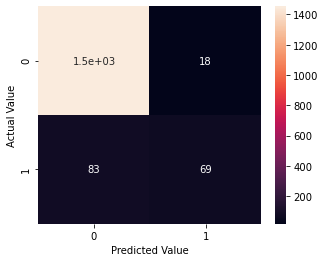

In [365]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [392]:
69/(69+83)

0.45394736842105265

In [290]:
proba_df= pd.DataFrame(y_pred, columns = ['proba_0', 'proba_1'])
proba_df

,proba_0,proba_1
0,0.693555,0.306445
1,0.718600,0.281400
2,0.723227,0.276773
3,0.720069,0.279931
4,0.727807,0.272193
...,...,...
1618,0.720919,0.279081
1619,0.723227,0.276773
1620,0.368211,0.631789
1621,0.726666,0.273334


In [324]:
thresh = .40
proba_df['class'] = [1 if proba > thresh else 0 for proba in proba_df['proba_1']]

In [326]:
cm = confusion_matrix(y_true, proba_df['class'])
cm
print(y_pred)

[[0.69355492 0.30644508]
 [0.71859996 0.28140004]
 [0.72322686 0.27677314]
 ...
 [0.36821146 0.63178854]
 [0.72666605 0.27333395]
 [0.71859996 0.28140004]]


Text(24.0, 0.5, 'Predicted Value')

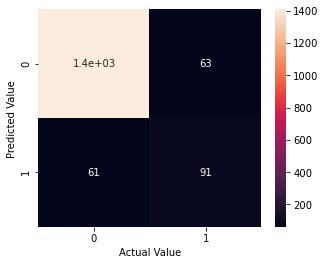

In [327]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [267]:
proba_df.head()

,proba_0,proba_1,class
0,0.693555,0.306445,1
1,0.718600,0.281400,0
2,0.723227,0.276773,0
3,0.720069,0.279931,0
4,0.727807,0.272193,0


In [266]:
cm_Grid = confusion_matrix(y_true, proba_df['class'])
cm_Grid

array([[1035,  436],
       [   9,  143]])

In [230]:
y_pred

array([[0.69355492, 0.30644508],
       [0.71859996, 0.28140004],
       [0.72322686, 0.27677314],
       ...,
       [0.36821146, 0.63178854],
       [0.72666605, 0.27333395],
       [0.71859996, 0.28140004]])

In [366]:
from sklearn.metrics import roc_auc_score

lr=LogisticRegression(solver='liblinear',max_iter=100,penalty='l1', C=0.5, random_state=1)

In [367]:
clf_1 = lr.fit(X_train, y_train)

In [368]:
#auc_train = roc_auc_score(y_train, clf_1.predict_proba(X_train)[:, 1])
#auc_test = roc_auc_score(y_test, clf_1.predict_proba(X_test)[:, 1])
print(clf_1.score(X_train, y_train))
print(clf_1.score(X_test, y_test))
#print(clf_1.best_params_)

0.8785298072613178
0.9303758471965496


In [369]:
lr.coef_

array([[ 0.20756383, -0.10391489,  0.23971197,  0.        , -0.09836187,
         0.02080851, -3.62771079,  4.36855273,  0.        ,  1.74665834,
         0.02794713,  0.        ,  0.2405314 ,  0.33698824, -1.12769059,
         0.05078695,  0.        ,  0.        ,  0.07695184,  0.        ,
         0.        ,  0.01390509,  0.        , -0.46284187,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.34229504,  0.        ]])

In [370]:
display = pd.DataFrame(clf_1.coef_,
                   columns=X_train.columns)
display = display.T
display.columns = ['coef']
display= display.reset_index()
display.sort_values(by='coef', ascending=False)


,index,coef
7,Unique_DiagnosisGroupCode,4.368553
9,Unique_ClmAdmitDiagnosisCode,1.746658
13,Claim_count,0.336988
12,Avg_Total_Claim_Cost,0.240531
2,Avg_Hospital_time,0.239712
0,Unique_count_counties,0.207564
18,ChronicCond_KidneyDisease,0.076952
15,RenalDiseaseIndicator,0.050787
10,Avg_Physicians,0.027947
5,ClmDiagnosisTotal_PP,0.020809


In [371]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.sort_values(by= "VIF Factor")

,features,VIF Factor
27,Age_20-30,1.095872
28,Age_30-40,1.351847
29,Age_40-50,1.826824
26,ChronicCond_stroke,2.066267
19,ChronicCond_Cancer,2.442824
30,Age_50-60,2.515961
34,Age_90-101,3.223274
15,RenalDiseaseIndicator,3.694369
24,ChronicCond_Osteoporasis,4.759325
25,ChronicCond_rheumatoidarthritis,4.857507


In [1922]:
X1= X1['Unique_count_counties','Unique_count_states', 'Avg_Hospital_time','Avg_Claim_Duration','ClmProcedureTotal_PP','ClmDiagnosisTotal_PP', 'DiagnosisGroupCode_Total','Unique_DiagnosisGroupCode','ClmAdmitDiagnosisCode_count','Unique_ClmAdmitDiagnosisCode','Avg_Physicians','Avg_Total_Claim_Cost_PP','Avg_Total_Claim_Cost','Claim_count','Unique_patients','RenalDiseaseIndicator', 'ChronicCond_Alzheimer','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke','Age_60-70']

,Unique_count_counties,Unique_count_states,Avg_Hospital_time,Avg_Claim_Duration,ClmProcedureTotal_PP,ClmDiagnosisTotal_PP,DiagnosisGroupCode_Total,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,Avg_Physicians,Avg_Total_Claim_Cost_PP,Avg_Total_Claim_Cost,Claim_count,Unique_patients,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
0,7,1,2.000000,2.440000,0.120000,3.200000,5,5,25,12,1.600000,1145.083333,1121.080000,25,24,0.33,0.58,0.75,0.71,0.21,0.38,0.38,0.83,0.92,0.25,0.33,0.21,0.00,0.00,0.00,0.08,0.12,0.29,0.25,0.25
2,28,9,1.000000,2.429530,0.000000,2.583893,0,0,149,26,1.604027,352.415459,352.214765,149,138,0.14,0.43,0.59,0.34,0.12,0.27,0.43,0.70,0.71,0.31,0.30,0.12,0.00,0.00,0.07,0.08,0.20,0.32,0.25,0.08
4,6,2,1.222222,1.958333,0.013889,2.986111,3,3,72,18,1.527778,234.129310,257.458333,72,58,0.16,0.36,0.52,0.29,0.10,0.21,0.36,0.62,0.69,0.29,0.28,0.16,0.00,0.05,0.03,0.10,0.24,0.34,0.12,0.09
5,9,2,1.186047,2.534884,0.046512,3.162791,2,2,43,10,1.534884,423.666667,399.348837,43,36,0.22,0.39,0.58,0.36,0.22,0.22,0.28,0.69,0.81,0.31,0.17,0.06,0.03,0.00,0.00,0.06,0.11,0.42,0.31,0.08
6,9,1,1.086207,1.551724,0.000000,2.534483,1,1,58,14,1.568966,223.132075,223.120690,58,53,0.21,0.43,0.64,0.42,0.08,0.34,0.51,0.70,0.77,0.34,0.26,0.04,0.00,0.02,0.04,0.08,0.15,0.42,0.21,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,15,3,2.685185,3.055556,0.203704,4.537037,22,21,54,22,1.703704,1520.255102,1487.629630,54,49,0.24,0.39,0.57,0.49,0.10,0.27,0.47,0.69,0.71,0.39,0.47,0.16,0.00,0.02,0.02,0.04,0.20,0.29,0.31,0.12
4939,44,16,1.751333,2.932667,0.101333,3.275333,185,158,1500,264,1.229333,554.155085,541.870000,1500,784,0.16,0.34,0.54,0.35,0.11,0.27,0.39,0.65,0.71,0.27,0.30,0.09,0.00,0.02,0.03,0.05,0.19,0.38,0.26,0.07
314,23,9,2.805687,3.516588,0.232227,4.341232,65,61,211,78,1.573460,1162.391122,1388.412322,211,199,0.17,0.40,0.57,0.44,0.18,0.30,0.45,0.76,0.79,0.37,0.36,0.10,0.00,0.04,0.04,0.04,0.20,0.40,0.23,0.07
2524,5,2,1.000000,2.350340,0.000000,2.340136,0,0,294,54,1.540816,318.647943,251.564626,294,103,0.15,0.37,0.50,0.37,0.10,0.25,0.37,0.69,0.71,0.21,0.33,0.06,0.00,0.00,0.05,0.04,0.16,0.47,0.24,0.05


## AFTER LASSO

In [1928]:
X_train_new= X_train.drop(['Unique_count_states','DiagnosisGroupCode_Total', 'Avg_Total_Claim_Cost_PP', 'Claim_count','RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_ObstrPulmonary','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_stroke','Age_20-30', 'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_70-80', 'Age_80-90', 'Age_90-101'], axis=1)

X_test_new= X_test.drop(['Unique_count_states','DiagnosisGroupCode_Total', 'Avg_Total_Claim_Cost_PP', 'Claim_count','RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_ObstrPulmonary','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_stroke','Age_20-30', 'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_70-80', 'Age_80-90', 'Age_90-101'], axis=1)

In [1929]:
lr1=LogisticRegression(solver='liblinear',max_iter=100)
clf_2 = lr1.fit(X1_train_new, y1_train)
print("Train Score", clf_2.score(X1_train_new, y1_train))
print("Test Score", clf_2.score(X1_test_new, y1_test))

Train Score 0.8566642388929352
Test Score 0.8464152225620115


In [1930]:
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y1_train, clf_2.predict_proba(X1_train_new)[:, 1])
auc_test = roc_auc_score(y1_test, clf_2.predict_proba(X1_test_new)[:, 1])
print(auc_train)
print(auc_test)

#0.9376005555572531
#0.9276848473652611

0.9359194380873131
0.92674825659262


In [1933]:
lr2=LogisticRegression(solver='liblinear',max_iter=100, C=206.913808111479, penalty='l1')

In [1934]:
from sklearn.metrics import roc_auc_score
clf_3 = lr1.fit(X1_train_new, y1_train)
auc_train = roc_auc_score(y1_train, clf_2.predict_proba(X1_train_new)[:, 1])
auc_test = roc_auc_score(y1_test, clf_2.predict_proba(X1_test_new)[:, 1])
print(auc_train)
print(auc_test)


0.9359194380873131
0.92674825659262


In [2080]:
X1_train

,Unique_count_counties,Unique_count_states,Avg_Hospital_time,Avg_Claim_Duration,ClmProcedureTotal_PP,ClmDiagnosisTotal_PP,DiagnosisGroupCode_Total,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,Avg_Physicians,Avg_Total_Claim_Cost_PP,Avg_Total_Claim_Cost,Claim_count,Unique_patients,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
3593,-0.726554,-0.625131,2.348460,1.933499,3.433855,1.468203,-0.256642,-0.249839,-0.468208,-0.522145,2.922284,2.294059,2.365796,-0.454055,-0.512435,0.181818,0.363636,0.36,0.36,0.18,0.45,0.55,0.91,0.73,0.45,0.45,0.00,0.00,0.00,0.00,0.18,0.18,0.27,0.36,0.00
2495,0.038377,0.272537,-0.076676,-0.354683,-0.119036,-0.082437,0.667357,0.788190,0.240953,0.460143,-0.043374,-0.129276,-0.148929,0.025574,0.129790,0.130682,0.329545,0.53,0.34,0.14,0.28,0.39,0.64,0.70,0.29,0.28,0.12,0.01,0.02,0.01,0.04,0.22,0.38,0.21,0.12
952,-0.344089,-0.625131,0.668451,0.869776,0.385406,0.537213,-0.212642,-0.196607,-0.442263,-0.537988,0.546144,0.162644,0.189484,-0.415277,-0.430698,0.187500,0.500000,0.53,0.44,0.16,0.41,0.56,0.69,0.75,0.31,0.22,0.09,0.00,0.03,0.03,0.06,0.06,0.44,0.28,0.09
1910,0.038377,-0.400714,0.996046,0.844569,0.760366,1.191422,0.315357,0.335716,-0.174165,-0.031001,-0.417558,0.737637,0.813892,-0.356088,-0.356744,0.333333,0.411765,0.67,0.51,0.08,0.45,0.41,0.69,0.71,0.35,0.39,0.10,0.00,0.00,0.02,0.06,0.22,0.51,0.16,0.04
2219,2.078190,3.863209,-0.210402,-0.251295,-0.272617,-0.231894,1.327356,1.506826,1.071190,1.394900,0.307052,-0.341380,-0.280191,0.778694,1.612747,0.156194,0.375224,0.55,0.39,0.16,0.30,0.43,0.73,0.78,0.31,0.32,0.11,0.01,0.02,0.02,0.07,0.18,0.34,0.28,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,-0.152856,-0.176297,-0.643770,-0.763884,-0.655528,-0.643673,-0.520641,-0.569232,-0.355780,-0.316182,-0.321009,-0.646861,-0.639933,-0.184646,-0.220515,0.139535,0.337209,0.55,0.34,0.13,0.26,0.40,0.69,0.81,0.36,0.31,0.08,0.01,0.03,0.01,0.03,0.13,0.40,0.34,0.05
2176,3.671795,4.312043,0.985228,0.780311,1.030946,1.082582,5.683349,5.446014,2.256008,2.361345,0.076711,0.843554,0.835480,0.482753,1.176812,0.211236,0.449438,0.65,0.50,0.22,0.41,0.50,0.74,0.82,0.30,0.39,0.13,0.00,0.02,0.05,0.05,0.14,0.35,0.26,0.14
1011,-0.854042,-0.625131,-0.643770,-1.219028,-0.655528,1.744983,-0.520641,-0.569232,-0.580636,-0.728109,3.937334,-0.715808,-0.710405,-0.476506,-0.543574,0.000000,0.333333,1.00,0.00,0.33,0.67,1.00,0.67,0.67,0.33,0.33,0.33,0.00,0.00,0.00,0.00,0.67,0.00,0.33,0.00
695,-0.089112,0.048120,1.137653,0.833460,1.597419,1.237552,1.679355,1.879452,0.336085,0.634419,0.088603,1.497323,1.419776,-0.188728,-0.076501,0.170732,0.357724,0.59,0.41,0.14,0.37,0.43,0.72,0.79,0.33,0.27,0.09,0.00,0.05,0.02,0.01,0.26,0.37,0.20,0.10


## Random Forest

In [375]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

randomForest.set_params(random_state=0)

randomForest.fit(X_train, y_train) 

print(randomForest.score(X_train, y_train))
print(randomForest.score(X_test, y_test))

0.9997758852532497
0.9359211337030191


In [388]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

In [389]:
param_grid_forest = {
    'criterion': ['gini'],
    'n_estimators': [100, 200, 300],
    'max_depth': [12, 13, 14], # 2 to the power of # of obs. 
    'max_features': [8,10,12],
    'min_samples_leaf': [3,4,5]
}

In [390]:
clf = GridSearchCV(rf, param_grid = param_grid_forest, cv = KFold(shuffle= True, random_state=1), verbose=True, n_jobs=-1, return_train_score = True, scoring ='roc_auc')

In [391]:
best_for= clf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [380]:
best_for.best_score_

0.9720655671283851

In [382]:
best_for.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [383]:
print(best_for.score(X_train, y_train))
print(best_for.score(X_test, y_test))

0.9993964711680519
0.9356730115567641


In [384]:
y_pred1 = best_for.best_estimator_.predict(X_test)

In [385]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[1425,   46],
       [  61,   91]])

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [387]:
91/(91+61)
#Logistic 0.45394736842105265

0.5986842105263158

In [424]:
# Feature Importance
RFC_final = best_for.best_estimator_
feature_importance = list(zip(X_train.columns, RFC_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('DiagnosisGroupCode_Total', 0.2454212729503589),
 ('Unique_DiagnosisGroupCode', 0.11827911711009197),
 ('ClmAdmitDiagnosisCode_count', 0.08279654905123655),
 ('Unique_ClmAdmitDiagnosisCode', 0.07280236209255053),
 ('ClmProcedureTotal_PP', 0.05247744046707821),
 ('Claim_count', 0.03645681537416567),
 ('Unique_patients', 0.03452061865649323),
 ('Avg_Hospital_time', 0.023776388791817083),
 ('Age_50-60', 0.01954051180446756),
 ('Avg_Claim_Duration', 0.01666626063749777),
 ('Age_30-40', 0.015698565462211968),
 ('Unique_count_states', 0.015447965590989585),
 ('Avg_Total_Claim_Cost_PP', 0.014950509750161751),
 ('Age_40-50', 0.014891335589425698),
 ('Avg_Total_Claim_Cost', 0.014661556126963397),
 ('Age_60-70', 0.013692246410006974),
 ('Age_70-80', 0.013453956018020964),
 ('ClmDiagnosisTotal_PP', 0.013105015038355405),
 ('ChronicCond_IschemicHeart', 0.012805883346087878),
 ('ChronicCond_Alzheimer', 0.01226316352396782),
 ('ChronicCond_Heartfailure', 0.011534324041268567),
 ('Age_20-30', 0.011

<BarContainer object of 35 artists>

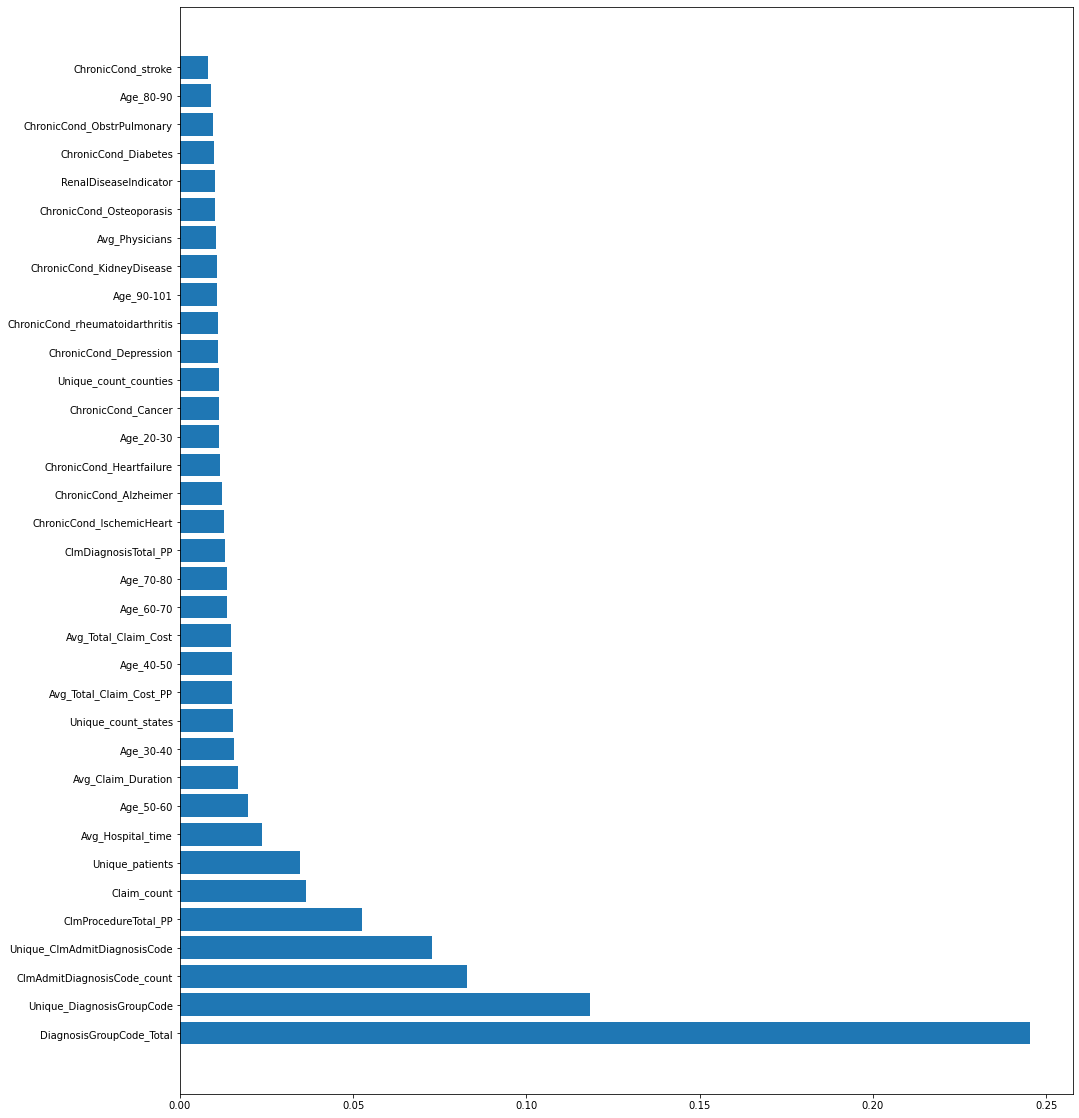

In [425]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

## SVM

In [403]:
from sklearn import svm


In [404]:
svm= svm.SVC(random_state= 1)

In [405]:
grid_para_svm = [
    #{'C': range(2000, 4500, 300), 'degree': [3, 4, 5],
     #                     'kernel': ['poly']},
    {'C': range(2000, 4500, 300),
     'gamma': np.logspace(-2, -4, 5),
     'kernel': ['rbf']}
]


In [406]:
svm_search = GridSearchCV(svm, grid_para_svm, scoring='roc_auc', cv=KFold(shuffle = True, random_state=1), n_jobs=-1, verbose =True)
svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(random_state=1), n_jobs=-1,
             param_grid=[{'C': range(2000, 4500, 300),
                          'gamma': array([0.01      , 0.00316228, 0.001     , 0.00031623, 0.0001    ]),
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=True)

In [407]:
print(svm_search.best_params_)
print(svm_search.best_score_)
print(svm_search.score(X_train, y_train))
print(svm_search.score(X_test, y_test))

#0.9941062522133403
#0.853241618662564

{'C': 3800, 'gamma': 0.01, 'kernel': 'rbf'}
0.9504962160338015
0.9808252209376946
0.8881131704175463


In [408]:
svm_pred = svm_search.best_estimator_.predict(X_test)
confusion_matrix(y_test, svm_pred)

array([[1380,   91],
       [  49,  103]])

In [401]:
105/(105+47) #poly

0.6907894736842105

In [409]:
103/(103+49) #rbf

0.6776315789473685

## Gradient Boosting 

In [417]:
from sklearn.ensemble import GradientBoostingClassifier

In [444]:
param_grid_gbc = {
    "n_estimators": [1500, 2000, 2500], # trade-off with learning rate.  More trees the more overfitting.
    "learning_rate": np.linspace(0.1, 1, 10),
    "min_samples_split": range(1, 10),
    "min_samples_leaf":range(1,10),
    "max_features": list(range(5, 35, 5)),
    "max_depth": range(5, 30, 5)
}

In [445]:
gbc= GradientBoostingClassifier(random_state=1)

from sklearn.model_selection import RandomizedSearchCV, KFold 
gbc_RandomGrid = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid_gbc, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, random_state=1)

In [447]:
gbc_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.89847795 0.86306725        nan 0.8780834  0.86889158        nan
 0.93029944 0.89130708 0.86328946 0.86710162]
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': range(5, 30, 5),
                                        'max_features': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(1, 10),
                                        'n_estimators': [1500, 2000, 2500]},
                   random_state=1, verbose=2)

In [518]:
print(gbc_RandomGrid.best_params_)
print(gbc_RandomGrid.best_score_) # CV score 
print("*****")
print(gbc_RandomGrid.score(X_train, y_train))
print(gbc_RandomGrid.score(X_test, y_test))

{'n_estimators': 2500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 5, 'learning_rate': 0.7000000000000001}
0.9302994390852619
*****
1.0
0.929143561306223


In [519]:
gbc_pred = gbc_RandomGrid.best_estimator_.predict(X_test)
confusion_matrix(y_test, gbc_pred)

array([[1432,   39],
       [  76,   76]])

In [520]:
plt.figure(figsize=(5,4))
sns.heatmap(gbc_pred, annot=True, fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

IndexError: Inconsistent shape between the condition and the input (got (1623, 1) and (1623,))

<Figure size 360x288 with 0 Axes>

In [423]:
92/(92+60)

0.6052631578947368

In [426]:
# Feature Importance
gbc_final = gbc_RandomGrid.best_estimator_
feature_importance = list(zip(X_train.columns, gbc_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('DiagnosisGroupCode_Total', 0.4631522426232505),
 ('Claim_count', 0.04885320034639919),
 ('Unique_ClmAdmitDiagnosisCode', 0.0483516576883543),
 ('Unique_DiagnosisGroupCode', 0.04286409275608818),
 ('Age_30-40', 0.0344936951190868),
 ('ClmAdmitDiagnosisCode_count', 0.029384800967084106),
 ('Unique_count_states', 0.02786723678414023),
 ('Unique_patients', 0.02336467367495386),
 ('Age_50-60', 0.02316644686450684),
 ('Age_20-30', 0.022583558146376782),
 ('ClmProcedureTotal_PP', 0.018097026795884555),
 ('Avg_Hospital_time', 0.01796056537464147),
 ('Age_40-50', 0.017201964883689663),
 ('Avg_Claim_Duration', 0.017005337412937995),
 ('Avg_Total_Claim_Cost_PP', 0.016365090430483675),
 ('Avg_Total_Claim_Cost', 0.013046295873743554),
 ('Unique_count_counties', 0.01300489476492578),
 ('ClmDiagnosisTotal_PP', 0.011419993522053994),
 ('Age_70-80', 0.011383651273509415),
 ('Avg_Physicians', 0.009978894115399178),
 ('ChronicCond_Osteoporasis', 0.00783814154402885),
 ('Age_60-70', 0.00776405969592514

<BarContainer object of 35 artists>

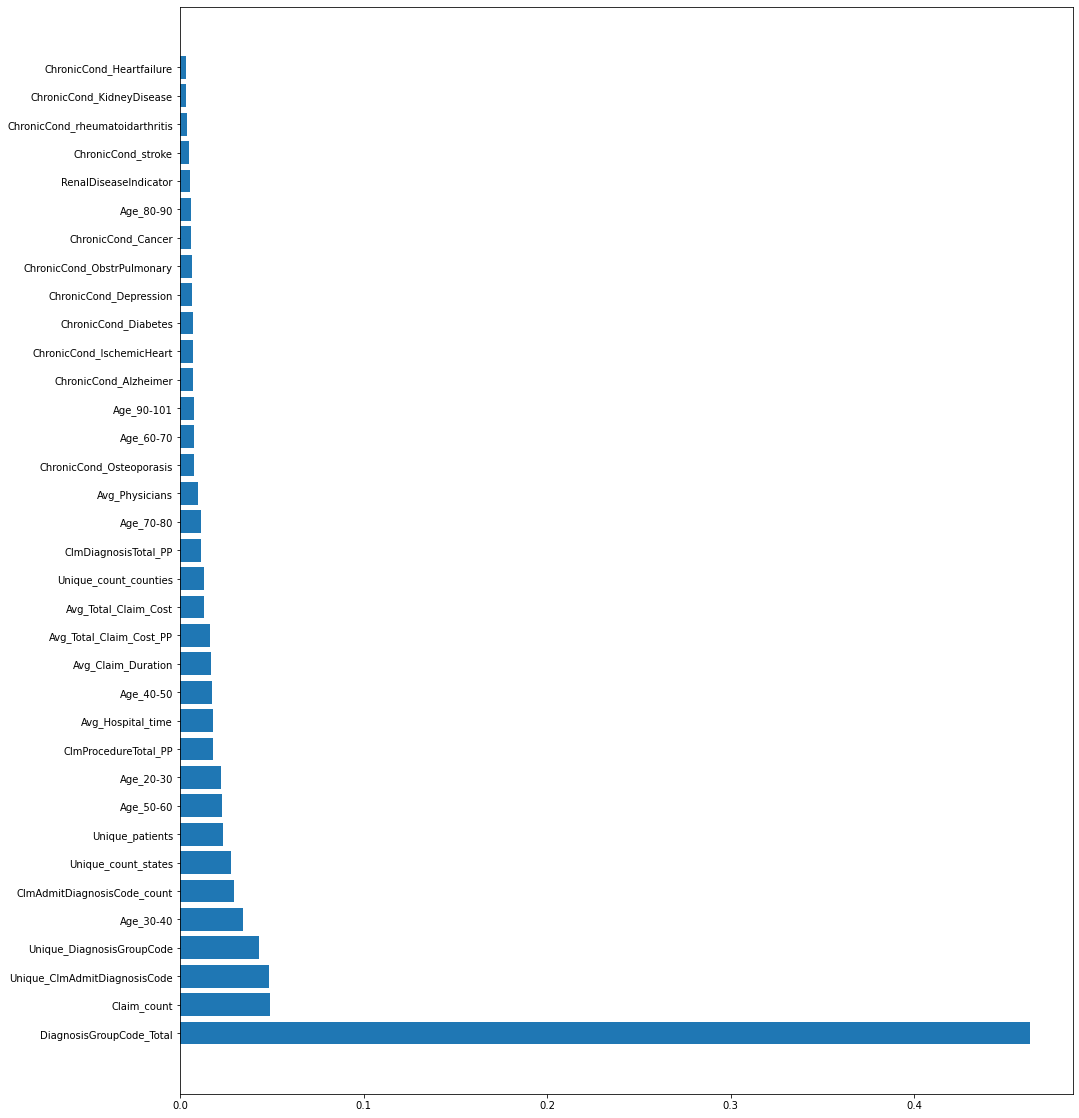

In [427]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

In [521]:
df_merged.to_csv('Data')